In [1]:
# import statements:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
#creating a list
states = list() #a list of dictionaries, each containing data of an individual state as STRINGS!
total_case_counts = {} #ONE dictionary. Key = state name, Value = total cases

page = requests.get("https://www.worldometers.info/coronavirus/country/us/")
# print(page.status_code)
# print(page.content) *tried it. It works! REALLY LONG though!

soup = BeautifulSoup(page.text, 'html.parser')
cases = soup.find(id = 'usa_table_countries_today')

for chunk in cases.find_all('tbody'):
    rows = chunk.find_all('tr')
    for row in rows:
        if(row.find('a', class_ = 'mt_a')):
            state_name = row.find('a', class_ = 'mt_a').text.strip()
            total_cases = row.find_all('td', style= 'font-weight: bold; text-align:right')[0].text.strip()
            total_deaths = row.find_all('td', style= 'font-weight: bold; text-align:right;')[1].text.strip()
            total_recovered = row.find_all('td', style= 'font-weight: bold; text-align:right;')[3].text.strip()
            total_active = row.find('td', style= 'text-align:right;font-weight:bold;').text.strip()
            
        
            #adding to master list of dictionaries.
            state_dict = {
                "State": state_name,
                "Cases": total_cases,
                "Total Deaths": total_deaths,
                "Total Recovered": total_recovered,
                "Total Active Cases": total_active
            }
            states.append(state_dict)
            
            #adding to dictionary of JUST state name and cases.
            total_case_counts[state_name] = int(total_cases.replace(",",""))

In [4]:
# printing state data to console.:

for state in states:
    print(state)

{'State': 'Texas', 'Cases': '913,494', 'Total Deaths': '18,066', 'Total Recovered': '770,262', 'Total Active Cases': '125,166'}
{'State': 'California', 'Cases': '907,436', 'Total Deaths': '17,357', 'Total Recovered': '465,945', 'Total Active Cases': '424,134'}
{'State': 'Florida', 'Cases': '778,636', 'Total Deaths': '16,438', 'Total Recovered': '534,714', 'Total Active Cases': '227,484'}
{'State': 'New York', 'Cases': '531,648', 'Total Deaths': '33,565', 'Total Recovered': '415,231', 'Total Active Cases': '82,852'}
{'State': 'Illinois', 'Cases': '378,969', 'Total Deaths': '9,775', 'Total Recovered': '268,879', 'Total Active Cases': '100,315'}
{'State': 'Georgia', 'Cases': '350,923', 'Total Deaths': '7,809', 'Total Recovered': '184,920', 'Total Active Cases': '158,194'}
{'State': 'North Carolina', 'Cases': '260,099', 'Total Deaths': '4,157', 'Total Recovered': '218,541', 'Total Active Cases': '37,401'}
{'State': 'Tennessee', 'Cases': '247,587', 'Total Deaths': '3,131', 'Total Recovered'

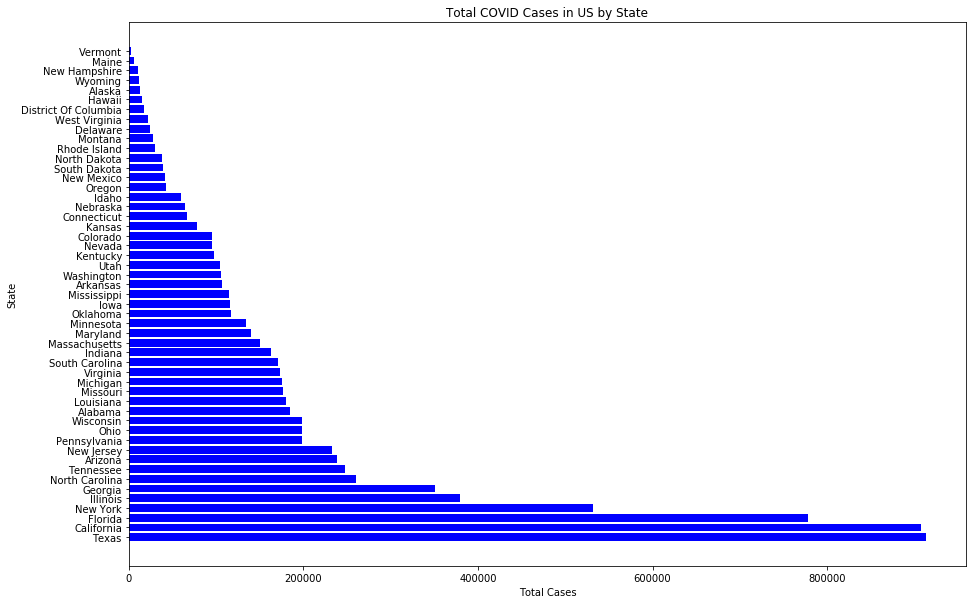

In [5]:
#Attempt at plotting/visualizing data - tried to plot bar graph of total cases in each state
states_list = []
for st in total_case_counts.keys():
    states_list.append(st)
    
cases_list = []
for val in total_case_counts.values():
    cases_list.append(val)

plt.figure(figsize=(15, 10))
plt.barh(states_list, cases_list, color='blue')
plt.ylabel("State")
plt.xlabel("Total Cases")
plt.title("Total COVID Cases in US by State")
plt.show()